# Molecular Dynamics with NequIP 

### NequIP Authors: Simon Batzner, Albert Musaelian, Lixin Sun, Anders Johansson, Boris Kozinsky

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/nequip3.png?raw=true" width="60%">

### Tutorial for MD for bulk water modified from this other [Colab Tutorial](https://bit.ly/mrs-nequip)
#### by Gabriele Tocci

### The water trajectory is obtained with the SCAN functional at 300 K and is the last 10 ps of a trajectory used in the paper by Herrero et al.: [Connection between water's dynamical and structural properties: Insights from ab initio simulations ](https://www.pnas.org/doi/10.1073/pnas.2121641119)

### Open in colab and change the runtime to use the GPU
<a href="https://colab.research.google.com/github/gabriele16/nequip/blob/main/colab/my-short-nequip-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [ ]:
!pip install torch==1.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:43tcmalloc: large alloc 1147494400 bytes == 0x3aa04000 @  0x7fd1ca07e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.10.0 which is incom

In [ ]:
import warnings
import os
data_dir = '/content/nequip/data'

In [ ]:
import torch
print(torch. __version__)
torch.cuda.is_available()

1.10.0+cu102


True

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!rm -r lammps
!git clone -b "stable_29Sep2021_update2" --depth 1 "https://github.com/lammps/lammps.git"
!git clone https://github.com/mir-group/pair_nequip
!cd pair_nequip && ./patch_lammps.sh /content/lammps/
!cd ..

rm: cannot remove 'lammps': No such file or directory
Cloning into 'lammps'...
remote: Enumerating objects: 11732, done.
remote: Counting objects: 100% (11732/11732), done.
remote: Compressing objects: 100% (8603/8603), done.
remote: Total 11732 (delta 3943), reused 6318 (delta 2930), pack-reused 0
Receiving objects: 100% (11732/11732), 110.00 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (3943/3943), done.
Note: checking out '7586adbb6a61254125992709ef2fda9134cfca6c'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

Checking out files: 100% (11058/11058), done.
Cloning into 'pair_nequip'...
remote: Enumerating objects: 418, done.
remo

In [ ]:
!cp /content/pair_nequip/*.cpp /content/lammps/src/
!cp /content/pair_nequip/*.h /content/lammps/src/
! sed -i 's/CMAKE_CXX_STANDARD 11/CMAKE_CXX_STANDARD 14/g'  /content/lammps/cmake/CMakeLists.txt

In [ ]:
!pip install mkl mkl-include

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.0 MB/s 


In [ ]:
!cd lammps && mkdir -p build && cd build && cmake ../cmake -DCMAKE_PREFIX_PATH=`python -c 'import torch;print(torch.utils.cmake_prefix_path)'` && make -j4

-- The CXX compiler identification is GNU 7.5.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Git: /usr/bin/git (found version "2.17.1") 
-- Appending /usr/local/cuda/lib64/stubs to CMAKE_LIBRARY_PATH: /usr/local/cuda/lib64/stubs
-- Running check for auto-generated files from make-based build system
-- Found MPI_CXX: /usr/lib/x86_64-linux-gnu/openmpi/lib/libmpi_cxx.so (found version "3.1") 
-- Found MPI: TRUE (found version "3.1")  
-- Looking for C++ include omp.h
-- Looking for C++ include omp.h - found
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Found JPEG: /usr/lib/x86_64-linux-gnu/libjpeg.so (found version "80") 
-- Found PNG: /usr/lib/x86_64-linux-gnu/libpng.so (found version "1.6.34") 
-- Found ZLIB: /usr/lib/x86_64-linux-gnu/libz.so (found version "1.

### Clone nequip repository with the AIMD data file

In [ ]:
! git clone --depth 1 "https://github.com/gabriele16/nequip.git"
! cd nequip && git pull

Cloning into 'nequip'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 183 (delta 6), reused 86 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 39.50 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Already up to date.


### Extract configurations and forces of AIMD trajectory

In [ ]:
! tar -xzvf  /content/nequip/data/AIMD_data.tar.gz -C /content/nequip/data/
! ls /content/nequip/data/AIMD_data

._AIMD_data
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.google.drivefs.item-id#S'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
AIMD_data/
AIMD_data/._WATER-frc-10k-1.xyz
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.google.drivefs.item-id#S'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
AIMD_data/WATER-frc-10k-1.xyz
AIMD_data/._celldata.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.google.drivefs.item-id#S'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
AIMD_data/celldata.dat
AIMD_data/._WATER-pos-10k-1.xyz
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.google.drivefs.item-id#S'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
AIMD_data/WATER-pos-10k-1.xyz
celldata.dat  WATER-frc-10k-1.xyz  WATER-pos-10k-1.xyz


In [ ]:
import numpy as np
import pandas as pd
# install wandb
!pip install wandb
# install nequip
!pip install nequip/
# fix colab imports
import site
site.main()
# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"
import numpy as np
from ase.io import read, write

np.random.seed(0)
torch.manual_seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 145 kB 76.5 MB/s 
     |████████████████████████████████| 181 kB 63.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=569719a4eb6efcbf727799b18feef246d27e85aa756c594fe67466fff1f63029
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./nequip
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pi

In [ ]:
!pip3 install nglview
!jupyter-nbextension enable nglview --py --sys-prefix
import nglview as nv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057551 sha256=f5b3d37220f8654d8bd6eedb7205a8bc85338ce1121430ba8d3c015971ac1a03
  Stored in directory: /root/.cache/pip/wheels/01/0c/49/c6f79d8edba8fe89752bf20de2d99040bfa57db0548975c5d5
Successfully built nglview
Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
def MD_reader_xyz(f, data_dir, no_skip = 0):
  filename = os.path.join(data_dir, f)
  fo = open(filename, 'r')
  natoms_str = fo.read().rsplit(' i = ')[0]
  natoms = int(natoms_str.split('\n')[0])
  fo.close()  
  fo = open(filename, 'r')
  samples = fo.read().split(natoms_str)[1:]
  steps = []
  xyz = []
  temperatures = []
  energies = []
  for sample in samples[::no_skip]:
     entries = sample.split('\n')[:-1]
     energies.append(float(entries[0].split("=")[-1]))
     temp = np.array([list(map(float, lv.split()[1:])) for lv in entries[1:]])
     xyz.append(temp[:,:])
  return natoms_str, np.array(xyz), np.array(energies)     

In [ ]:
from ase.build import sort
def MD_writer_xyz(positions,forces,cell_vec_abc,energies,
                  data_dir,f,  conv_frc = 1.0 , conv_ener = 1.0 ):

  filename = os.path.join(data_dir, f)
  fo = open(filename, 'w')

  for it, frame in enumerate(positions):
    natoms = len(frame)
    fo.write("{:5d}\n".format(natoms))
    fo.write('Lattice="{:.5f} 0.0 0.0 0.0 {:.5f} 0.0 0.0 0.0 {:.5f}" \
    Properties="species:S:1:pos:R:3:forces:R:3" \
    energy={:.10f} pbc="T T T"\n'.format(cell_vec_abc[0],cell_vec_abc[1],cell_vec_abc[2],energies[it]*conv_ener)    
    )
    if it%1000 == 0.0:
      print(it)
    
    sorted_frame = sort(frame)
    sorted_forces = sort(forces[it])

    fo.write("".join("{:8s} {:.8f} {:16.8f} {:16.8f}\
     {:16.8f} {:16.8f} {:16.8f}\n".format(sorted_frame[iat].symbol,
                                          sorted_frame[iat].position[0],
                                          sorted_frame[iat].position[1],
                                          sorted_frame[iat].position[2],
                                          sorted_forces[iat].position[0]*conv_frc,
                                          sorted_forces[iat].position[1]*conv_frc,
                                          sorted_forces[iat].position[2]*conv_frc)
                                          for iat in range(len(frame))))

In [ ]:
def read_cell(f,data_dir):
  filename = os.path.join(data_dir,f)
  fo = open(filename,'r')
  cell_list_abc = fo.read().split('\n')[:-1]
  cell_vec_abc = np.array([list(map(float, lv.split())) for lv in cell_list_abc]).squeeze()
  return(cell_vec_abc)

cell_vec_abc = read_cell('celldata.dat',data_dir + '/AIMD_data')
cell_vec_abc

array([9.85, 9.85, 9.85])

### Read positions, energies, forces from of a 32 water molecules box in .xyz format generated with CP2K using the SCAN functional
### The Energy is in Hartree while the forces are in eV/angstrom, therefore we convert also the energy in eV to make it consistent with LAMMPS "metal" units.

In [ ]:
wat_traj = read(data_dir +'/AIMD_data/WATER-pos-10k-1.xyz',index=':')
wat_frc = read(data_dir + '/AIMD_data/WATER-frc-10k-1.xyz', index=':')

### The reader below is required to get the energies.

In [ ]:
natoms, positions, energies = MD_reader_xyz('WATER-pos-10k-1.xyz', data_dir + '/AIMD_data/', no_skip=1)

### The writer below is useful to convert 2 separate ase Atom objects of the positions and forces, and np.arrays of energies and cell, to an .extxyz file that can be read by nequip.

In [ ]:
MD_writer_xyz(wat_traj, wat_frc, cell_vec_abc, energies, data_dir + '/AIMD_data/', 'wat_pos_frc-10k.extxyz',conv_frc = 1.0, conv_ener = 27.211399)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


### Turn on GPU

Make sure Runtime --> Change runtime type is set to GPU

## 3 Steps: 
* Train: using a data set, train the neural network 🧠 
* Deploy: convert the Python-based model into a stand-alone potential file for fast execution ⚡
* Run: run Molecular Dynamics, Monte Carlo, Structural Minimization, ...  with it in LAMMPS 🏃

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/all.png?raw=true" width="60%">

### Train a model

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/train.png?raw=true" width="60%">

Here, we will train a NequIP potential on the following system

* Water
* sampled at T=300K from AIMD
* Using 1000 training configurations
* The units of the reference data are in eV and A.

In [ ]:
import nequip
nequip.__version__

'0.5.5'

### Below is the configuration file used by nequip. We provide the dataset in an .extxyz file.

In [ ]:
from nequip.utils import Config
config = Config.from_file('/content/nequip/configs/my-full-example.yaml')
config

{'root': 'results/water', 'run_name': 'example-run-water', 'seed': 123, 'dataset_seed': 456, 'append': True, 'default_dtype': 'float32', 'allow_tf32': False, 'r_max': 4.0, 'num_layers': 4, 'l_max': 1, 'parity': True, 'num_features': 32, 'nonlinearity_type': 'gate', 'resnet': False, 'nonlinearity_scalars': {'e': 'silu', 'o': 'tanh'}, 'nonlinearity_gates': {'e': 'silu', 'o': 'tanh'}, 'num_basis': 8, 'BesselBasis_trainable': True, 'PolynomialCutoff_p': 6, 'invariant_layers': 2, 'invariant_neurons': 64, 'avg_num_neighbors': 'auto', 'use_sc': True, 'dataset': 'ase', 'dataset_file_name': './nequip/data/AIMD_data/wat_pos_frc-10k.extxyz', 'ase_args': {'format': 'extxyz'}, 'include_keys': ['user_label'], 'key_mapping': {'user_label': 'label0'}, 'chemical_symbols': ['H', 'O'], 'verbose': 'info', 'log_batch_freq': 1, 'log_epoch_freq': 1, 'save_checkpoint_freq': -1, 'save_ema_checkpoint_freq': -1, 'n_train': 100, 'n_val': 50, 'learning_rate': 0.005, 'batch_size': 5, 'validation_batch_size': 10, 'm

In [ ]:
!rm -rf ./results
!nequip-train /content/nequip/configs/my-full-example.yaml

Torch device: cuda
Processing dataset...
Loaded data: Batch(atomic_numbers=[960000, 1], batch=[960000], cell=[10000, 3, 3], edge_cell_shift=[25556838, 3], edge_index=[2, 25556838], forces=[960000, 3], pbc=[10000, 3], pos=[960000, 3], ptr=[10001], total_energy=[10000, 1])
Cached processed data to disk
Done!
Successfully loaded the data set of type ASEDataset(10000)...
Replace string dataset_forces_rms to 0.7736424803733826
Replace string dataset_per_atom_total_energy_mean to -156.0919189453125
Atomic outputs are scaled by: [H, O: 0.773642], shifted by [H, O: -156.091919].
Replace string dataset_forces_rms to 0.7736424803733826
Initially outputs are globally scaled by: 0.7736424803733826, total_energy are globally shifted by None.
Successfully built the network...
Number of weights: 154200
! Starting training ...

validation
# Epoch batch         loss       loss_f       loss_e        f_mae       f_rmse      H_f_mae      O_f_mae  psavg_f_mae     H_f_rmse     O_f_rmse psavg_f_rmse        e

### Deploy the model

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/deploy.png?raw=true" width="60%">

We now convert the model to a potential file. This makes it independent of NequIP and we can use it any downstream application, such as LAMMPS. 

In [ ]:
! ls -lrth results/water/example-run-water

total 5.3M
-rw------- 1 root root 227K Jul  7 13:26 config.yaml
-rw-r--r-- 1 root root  489 Jul  7 13:26 metrics_initialization.csv
-rw-r--r-- 1 root root 517K Jul  7 13:31 metrics_batch_train.csv
-rw-r--r-- 1 root root 131K Jul  7 13:31 metrics_batch_val.csv
-rw-r--r-- 1 root root  45K Jul  7 13:31 metrics_epoch.csv
-rw------- 1 root root 657K Jul  7 13:31 best_model.pth
-rw-r--r-- 1 root root 593K Jul  7 13:31 log
-rw------- 1 root root 2.5M Jul  7 13:31 trainer.pth
-rw------- 1 root root 657K Jul  7 13:31 last_model.pth


In [ ]:
! nequip-deploy -h

usage: nequip-deploy [-h] [--verbose VERBOSE] {info,build} ...

Create and view information about deployed NequIP potentials.

optional arguments:
  -h, --help         show this help message and exit
  --verbose VERBOSE  log level

commands:
  {info,build}
    info             Get information from a deployed model file
    build            Build a deployment model


In [ ]:
!nequip-deploy build --train-dir /content/results/water/example-run-water water-deploy.pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.


## Evaluate Test Error on all remaining frames

Before running inference, we'd like to know how well the model is doing on a hold-out test set. We run the nequip-evaluate command to compute the test error on all data that we didn't use for training or validation. 

In [ ]:
!nequip-evaluate --train-dir results/water/example-run-water --batch-size 50

Using device: cuda
Loading model... 
loaded model from training session
Loading original dataset...
Loaded dataset specified in config.yaml.
Using origial training dataset (10000 frames) minus training (100 frames) and validation frames (50 frames), yielding a test set size of 9850 frames.
Starting...
  0% 0/9850 [00:00<?, ?it/s]

  1% 50/9850 [00:00<01:14, 131.22it/s]
  1% 100/9850 [00:01<02:07, 76.69it/s]
  2% 150/9850 [00:02<03:16, 49.37it/s]
  2% 200/9850 [00:04<03:46, 42.65it/s]
  3% 250/9850 [00:04<02:40, 59.72it/s]
  3% 300/9850 [00:04<02:01, 78.64it/s]
  4% 350/9850 [00:04<01:36, 98.56it/s]
  4% 400/9850 [00:05<01:20, 117.93it/s]
  5% 450/9850 [00:05<01:09, 136.14it/s]
  5% 500/9850 [00:05<01:01, 151.81it/s]
  6% 550/9850 [00:05<00:56, 164.41it/s]
  6% 600/9850 [00:06<00:53, 174.46it/s]
  7% 650/9850 [00:06<00:50, 182.24it/s]
  7% 700/9850 [00:06<00:48, 188.00it/s]
  8% 750/9850 [00:06<00:47, 192.16it/s]
  8% 800/9850 [00:07<00:46, 195.55it/s]
  9% 850/9850 [00:07<00:45, 198.31

Again, energy errors of < 1meV/atom (converted from kcal/mol to eV), and force errors of ~45 meV/A 🎉

# LAMMPS

We are now in a position to run MD with our potential.

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/run.png?raw=true" width="60%">

Set up a simple LAMMPS input file

CAUTION: the reference data here are in eV for the energies and eV/A for the forces. The NequIP model will therefore also be predicting outputs in these units. We are therefore using `units metal` in LAMMPS (see [docs](https://docs.lammps.org/units.html)). Time units are also in`ps`).

### We now run MD in the NVT ensemble for 10 ps (20,000 steps)

In [ ]:
lammps_input_md = """
units           metal
boundary        p p p
atom_style      atomic
thermo 1
newton off
read_data structure.data

neighbor        1.0 bin
neigh_modify    every 10 delay 0 check no

pair_style	nequip
pair_coeff	* * ../water-deploy.pth H O
mass            1 1.00794
mass            2 15.9994

velocity        all create 300.0 23456789
timestep        0.0005
fix             1 all nvt temp 300.0 300.0 $(100.0*dt)

#print log every X steps
thermo          100
thermo_style    custom step pe ke etotal temp press vol

#print trajectory in xyz every X time units
dump              1 all xyz 20 water.xyz 
dump_modify       1 element H O

# dump            2 all custom 1 dump_frc.lamppstrj id type element fx fy fz
# dump_modify     2 element O H
# dump            3 all custom 1 dump.lammpstrj id type element x y z
# dump_modify     3 element O H

run             20000
"""

!mkdir lammps_run
with open("lammps_run/water_md.in", "w") as f:
    f.write(lammps_input_md)

In [ ]:
! cp /content/water-deploy.pth /content/lammps_run/.

We specify the initial water configuration by reading the extxyz file and writing to structure.data file easily parsed by lammps

In [ ]:
wat_pos_frc_trj = read('/content/nequip/data/AIMD_data/wat_pos_frc-10k.extxyz')
write("/content/lammps_run/structure.data", wat_pos_frc_trj,format='lammps-data')


### Run the LAMMPS command: 

In [ ]:
! cat /content/lammps_run/water_md.in
! cat /content/lammps_run/structure.data


units           metal
boundary        p p p
atom_style      atomic
thermo 1
newton off
read_data structure.data

neighbor        1.0 bin
neigh_modify    every 10 delay 0 check no

pair_style	nequip
pair_coeff	* * ../water-deploy.pth H O
mass            1 1.00794
mass            2 15.9994

velocity        all create 300.0 23456789
timestep        0.0005
fix             1 all nvt temp 300.0 300.0 $(100.0*dt)

#print log every X steps
thermo          100
thermo_style    custom step pe ke etotal temp press vol

#print trajectory in xyz every X time units
dump              1 all xyz 20 water.xyz 
dump_modify       1 element H O

# dump            2 all custom 1 dump_frc.lamppstrj id type element fx fy fz
# dump_modify     2 element O H
# dump            3 all custom 1 dump.lammpstrj id type element x y z
# dump_modify     3 element O H

run             20000
/content/lammps_run/structure.data (written by ASE) 

96 	 atoms 
2  atom types
0.0      9.8499999999999996  xlo xhi
0.0      9.84999

## Run MD!

In [ ]:
!cd /content/lammps_run/ && ../lammps/build/lmp -in water_md.in

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (9.8500000 9.8500000 9.8500000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  96 atoms
  read_data CPU = 0.001 seconds
NEQUIP is using device cuda
NequIP Coeff: type 1 is element H
NequIP Coeff: type 2 is element O
Loading model from ../water-deploy.pth
Freezing TorchScript model...
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 5
  ghost atom cutoff = 5
  binsize = 2.5, bins = 4 4 4
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair nequip, perpetual
      attributes: full, newton off
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : metal
  Current step  : 0

### Visualize the trajectory with ase and ngl

In [ ]:
from ase.visualize import view

In [ ]:
wat_traj = read("/content/lammps_run/water.xyz",index='::10')

In [ ]:
for i in range(len(wat_traj)):
  wat_traj[i].cell = cell_vec_abc
  wat_traj[i].pbc = np.array([True,True,True])

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
view(wat_traj, viewer='ngl')

### Calculate radial distribution function with MDAnalysis

In [ ]:
!pip3 install MDAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 67.2 MB/s 
     |████████████████████████████████| 376 kB 77.4 MB/s 
     |████████████████████████████████| 2.1 MB 80.2 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.1.0-cp37-cp37m-linux_x86_64.whl size=4652236 sha256=744445583e89a093ac12f79e61a7b04687dd0a218f2679adbb0f1dcd9dec3f15
  Stored in directory: /root/.cache/pip/wheels/fa/dd/6b/9d51e7216a401b71949467a123e3b2dffba11256346f7f7bda
Successfully built MDAnalysis


In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

In [ ]:
reader = mda.coordinates.XYZ.XYZReader("/content/lammps_run/water.xyz")
topology = mda.topology.XYZParser.XYZParser("/content/lammps_run/water.xyz")

u = mda.Universe("/content/lammps_run/water.xyz")

u.dimensions = [cell_vec_abc[0], cell_vec_abc[1],cell_vec_abc[2], 90., 90., 90. ]

In [ ]:
O_at = u.select_atoms('name O')
H_at = u.select_atoms('name H')

Ordf = rdf.InterRDF(O_at, O_at,
                    nbins=75,  # default
                    range=(0.00001, 4.9),  # distance in angstroms
                   )
Ordf.run()

OHrdf = rdf.InterRDF(O_at, H_at,
                    nbins=75,  # default
                    range=(0.00001, 4.9),  # distance in angstroms
                   )
OHrdf.run()

HHrdf = rdf.InterRDF(H_at, H_at,
                    nbins=75,  # default
                    range=(0.00001, 4.9),  # distance in angstroms
                   )
HHrdf.run()


/usr/local/lib/python3.7/dist-packages/MDAnalysis/coordinates/base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'Radial distribution')

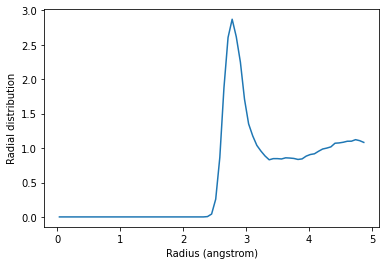

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ordf.bins, Ordf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')

/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'Radial distribution')

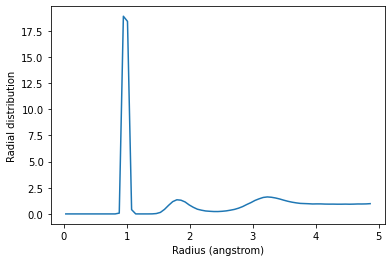

In [ ]:
plt.plot(OHrdf.bins, OHrdf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')

/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/MDAnalysis/analysis/rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'Radial distribution')

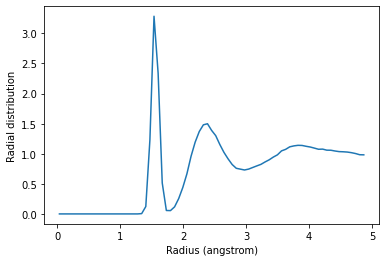

In [ ]:
plt.plot(HHrdf.bins, HHrdf.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')